In [1]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.1.0'

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2634 - accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1069 - accuracy: 0.9664
Epoch 3/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0752 - accuracy: 0.9766


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 58us/sample - loss: 0.0912 - accuracy: 0.9711
0.0911580096048303 0.9711


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


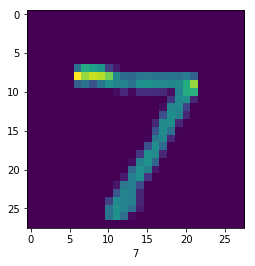

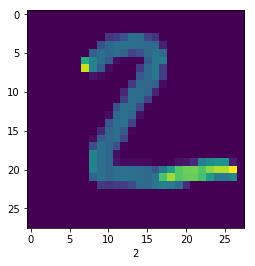

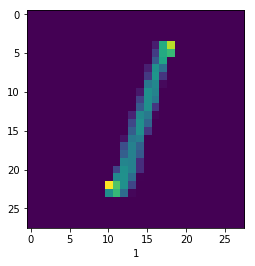

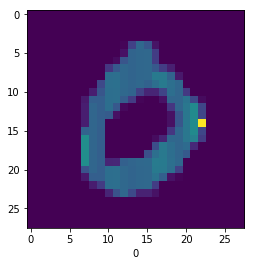

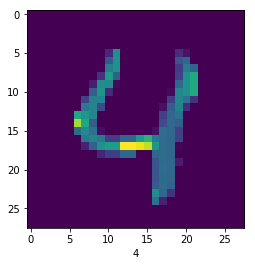

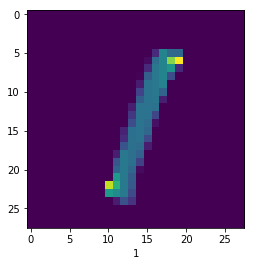

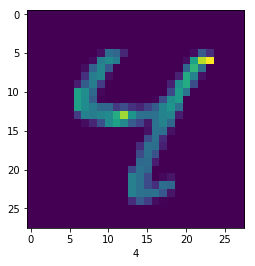

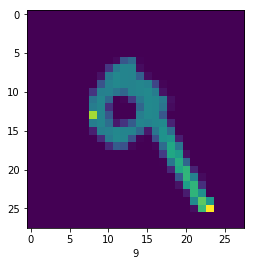

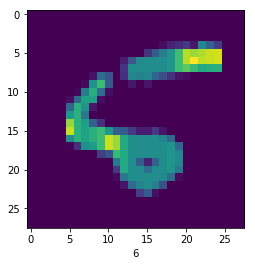

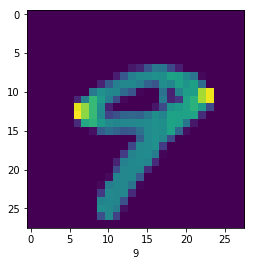

In [6]:
import matplotlib.pyplot as plt

predictions = model.predict([x_test])

for itr in range(10):
    plt.imshow(x_test[itr])
    plt.xlabel(np.argmax(predictions[itr]))
    plt.show()

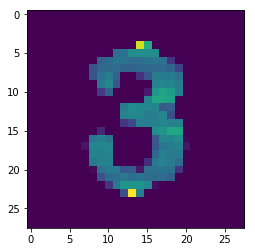

In [7]:
import cv2

img_size = 28
img = cv2.imread("img_3.jpg", cv2.IMREAD_GRAYSCALE)
new_img = cv2.resize(img,(img_size,img_size))
final = tf.keras.utils.normalize(new_img, axis = 1)
plt.imshow(final)

[[3.9025189e-04 6.0563580e-06 1.6046728e-01 7.5345832e-01 3.2623710e-08
  1.0282741e-06 5.9639835e-09 7.7061288e-02 8.5862866e-03 2.9574108e-05]]


Text(0.5, 0, '3')

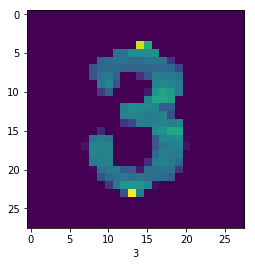

In [8]:
predictions = model.predict(final.reshape(-1,img_size,img_size,1))
print(predictions)
plt.imshow(final)
plt.xlabel(np.argmax(predictions))